<center>
  <a href="2.15-Example%20Regression.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="./" onclick="close_window();return false;">End of the Day</a>
  
</center>

# 2.17-Mini-Project Regression

1. Fill out Blanks   
   - Observe the mtcar Example
   - Fill out the blank (underline) with appropriate statements
   - Run to see whether the statement is correct
<br>   
2. Identify the 5 step of using scikit-learn API
<br>
3. Sort the statements according to the 5 steps of using the API
<br>
4. Add Comments/Markup
     - to add a line below, press 'b'
     - to add a line above, press 'a'
     - to change to markup, press 'm'
     <br>


Note: the target variable is 'resale_price" and the feature is 'floor_area_sqm'

In [4]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# load data 
df = pd.read_csv("resale-sample-regression.csv", index_col=0)
# df.head()

In [6]:
# look for unique values 
# df["town"].unique()
# df["month"].unique()
# df["town"].nunique()

In [7]:
# look at data type and change resale_price to number, if it is not

df[["resale_price"]] = df[["resale_price"]]. \
apply(pd.to_numeric, errors = "coerce")
# df["resale_price"].head()

#### Checking any missing values

In [8]:
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
Region                 False
dtype: bool

#### Separate Target Variable/ Outcome / Dependent Variable

In [9]:
y=df.resale_price
#df.resale_price=3612* df['floor_area_sqm']
#df.to_csv("ideal.csv", index = True)

In [10]:
# drop the columns name resale_price 
# from the dataframe (if we need to use all other variables)
df.drop(labels=['resale_price'], axis=1, inplace=True)

In [11]:
# df.head()

In [12]:
#y take only one column [Series] i.e., 
#Vector, X should take dataframe so df[['floor_area_sqm]]
X=df[['floor_area_sqm']]

#### Split data into train and test

In [13]:
# train_test_split function will return four values... assigned them 
# to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=.3, random_state=7)

#### Create an instance named it as model

In [14]:
model=LinearRegression()


In [15]:
# X_train.shape

In [16]:
#check the records in train dataset (2000*0.7=1400)
# y_train.shape

#### Train the model

In [17]:
# we train the data using fit model.fit(X_train, y_train
model.fit(X_train, y_train)

LinearRegression()

#### Performance Metric (Explained Variance)

In [22]:
#for the train dataset
model.score(X_train,y_train)

0.4699869146725788

In [23]:
#for the test dataset
model.score(X_test,y_test)

0.4410285894121678

In [24]:
predict_train=model.predict(X_train)

In [25]:
predict_test=model.predict(X_test)

#### Performance Metric (RMSE)

###### Get the mean_squared_error from y_train, predict_train.. 
Use np to sqrt it (Root Mean Squared Error)

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

###### Checking the RMSE i.e., the difference between y test and predict_test

In [29]:
np.sqrt(mean_squared_error(y_test, predict_test))

99147.5820847289

<AxesSubplot:xlabel='preds', ylabel='residuals'>

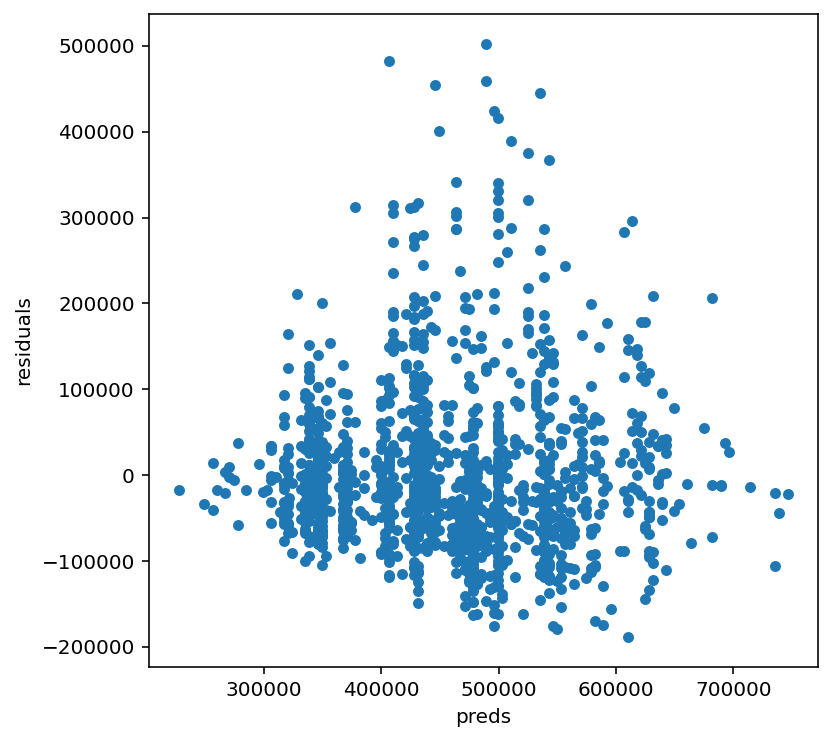

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":predict_train, "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

###### Create Another Graph that show the  residuals  between test data

<AxesSubplot:xlabel='preds', ylabel='residuals'>

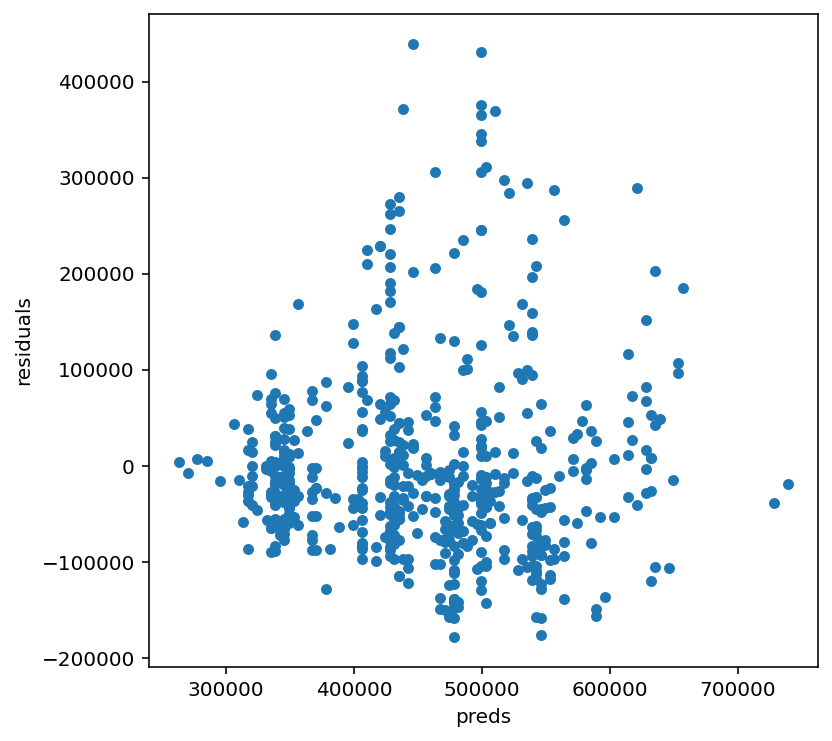

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":predict_test, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [31]:
model.coef_


array([3579.20154414])

In [32]:
model.intercept_

105800.6339640455

#### We have the model y= 105800.63 + 3579.20(sqm)

In [33]:
import statsmodels.api as sm
from scipy import stats

In [34]:
df_new = sm.add_constant(X_train)

In [35]:
est = sm.OLS(y_train, df_new)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1240.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          5.88e-195
Time:                        17:32:47   Log-Likelihood:                -18010.
No. Observations:                1400   AIC:                         3.602e+04
Df Residuals:                    1398   BIC:                         3.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.058e+05   1.02e+04     10.

<center>
  <a href="2.18-Further-Resources.ipynb">Further Resources</a>